In [1]:
import torch 
import numpy as np
import pandas as pd

In [2]:
inputs1 = torch.tensor(
    [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]],
    dtype=torch.float32
)

weights1 = torch.tensor(
    [[0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]],
    dtype=torch.float32
)

biases1 = torch.tensor(
    [2.0,3.0,0.5],
    dtype=torch.float32
)

In [3]:
def layer(inputs:list, weights:list, biases:list) -> list:
    """Pure python NN Layer

    Args:
        inputs (list): inputs from previous layer
        weights (list): weights of each neuron in layer
        biases (list): biases of each neuron in layer

    Returns:
        list: output of each neuron in layer 
    """
    layer_outputs = []
    for neuron_input in inputs:
        neuron_output = []
        for neuron_weights, neuron_bias in zip(weights, biases):
            output_vals = 0
            for n_input, weight in zip(neuron_input, neuron_weights):
                output_vals += n_input*weight
            output_vals += neuron_bias
            neuron_output.append(output_vals)
        layer_outputs.append(neuron_output)
    return layer_outputs

layer(inputs1.tolist(), weights1.tolist(), biases1.tolist())

[[4.80000002682209, 1.209999918937683, 2.385000005364418],
 [8.90000006556511, -1.8100001215934753, 0.19999997317790985],
 [1.410000077784062, 1.0509998478889457, 0.025999927461146655]]

In [4]:
def layer_vec(inputs:torch.tensor, weights:torch.tensor, biases:torch.tensor):
    """
        PyTorch vectorized NN Layer

    Args:
        inputs (torch.tensor): inputs from previous layer
        weights (torch.tensor): weights of each neuron in layer
        biases (torch.tensor): biases of each neuron in layer

    Returns:
        torch.tensor: output of each neuron in layer 
    """
    cummulative = torch.matmul(inputs, weights.T) + biases
    return cummulative

In [5]:
output1 = layer_vec(inputs1, weights1, biases1)

# Multi layer implementation 

In [6]:
X = torch.tensor(
    [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]],
    dtype=torch.float32
)

class Layer_Dense:
    """ 
        PyTorch Vectorized Dense Layer 
    """
    def __init__(self, n_inputs:int, n_neurons:int):
        self.weights = torch.randn(n_inputs, n_neurons)
        self.biases = torch.zeros((1, n_neurons))
    def forward(self, inputs:torch.tensor):
        self.output = torch.matmul(inputs, self.weights) + self.biases

In [7]:
L1 = Layer_Dense(4, 5)
L2 = Layer_Dense(5, 2)

In [8]:
L1.forward(X)
print(L1.output)
L2.forward(L1.output)
print(L2.output)

tensor([[ -2.9199,  -2.6472,   3.2969,  -3.4138,  -3.4666],
        [ -4.9482, -12.7343,  10.4805,  -7.3007,  -5.6835],
        [ -4.0061,   1.2792,   1.5337,   2.5904,   0.5797]])
tensor([[ -0.1208,  -1.5071],
        [ -1.4471, -16.7694],
        [ -9.8005,   2.6682]])


In [9]:
X.shape, L1.output.shape, L2.output.shape
print(f"Input shape:{list(X.shape)} --L1[4,5]--> {list(L1.output.shape)}")
print(f"Input shape:{list(L1.output.shape)} --L2[5,2]--> {list(L2.output.shape)}")

Input shape:[3, 4] --L1[4,5]--> [3, 5]
Input shape:[3, 5] --L2[5,2]--> [3, 2]


# Adding activation functions

In [10]:
class Activation:
    """
        PyTorch Vectorized Activation functions class
    """
    def __init__(self, name:str):
        if not hasattr(self, name):
            raise ValueError(f"Activation {name} is not defined.")
        self.activation = getattr(self, name)
    def ReLU(self, X:torch.tensor) -> torch.tensor:
        return torch.maximum(torch.zeros_like(X), X)

    def sigmoid(self, X:torch.tensor) -> torch.tensor:
        return 1/(1-torch.exp(-1*X))

    def LeakyReLU(self, X:torch.tensor) -> torch.tensor:
        return torch.maximum(0.01*X, X)
    
    def Linear(self, X:torch.tensor) -> torch.tensor:
        return X
    
    def Softmax(self, X:torch.tensor) -> torch.tensor:
        exp_vals = torch.exp(X - torch.max(X, dim=1, keepdims=True))
        return exp_vals / torch.sum(exp_vals, dim=1, keepdims=True)

In [11]:
from typing import Optional

class Linear:
    def forward(self, X:torch.tensor) -> torch.tensor:
        return X

class Sigmoid:
     def forward(self, X:torch.tensor) -> torch.tensor:
        self.output = 1/(1-torch.exp(-1*X))

class ReLU:
    def forward(self, X:torch.tensor):
        self.output = torch.maximum(torch.zeros_like(X), X)
        
class LeakyReLU:
    def forward(self, X:torch.tensor) -> torch.tensor:
        return torch.maximum(0.01*X, X)

class Softmax:
    __constants__ = ['dim']
    dim: Optional[int]

    def __init__(self, dim:int):
        self.dim = dim
    
    def forward(self, X: torch.tensor) -> torch.tensor:
        exp_vals = torch.exp(X - torch.max(X, dim=self.dim, keepdims=True))
        return exp_vals / torch.sum(exp_vals, dim=self.dim, keepdims=True)

In [12]:
class Layer_Dense_act:
    """ 
        PyTorch Vectorized Dense Layer with activation functions
    """
    def __init__(self, n_inputs:int, n_neurons:int, activation_name:str):
        self.weights = torch.randn(n_inputs, n_neurons) 
        self.biases = torch.zeros((1, n_neurons))
        self.activation = Activation(activation_name).activation
    def forward(self, inputs:torch.tensor):
        self.output = self.activation(
            torch.matmul(inputs, self.weights) + self.biases
            )

<function matplotlib.pyplot.show(close=None, block=None)>

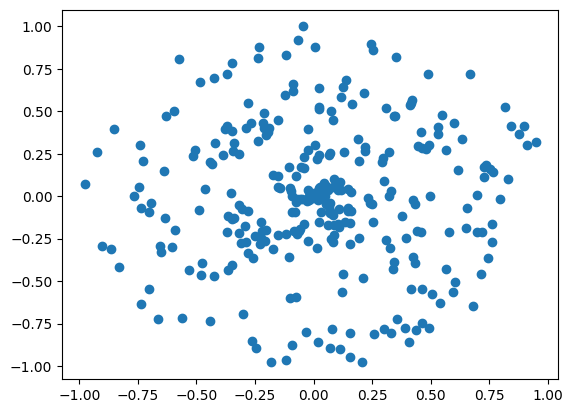

In [13]:
!pip install -qU nnfs
from nnfs.datasets import spiral_data

from matplotlib import pyplot as plt
torch.random.seed()
X,y = spiral_data(100,3)
X,y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.scatter(X[:,0], X[:,1])
plt.show

In [14]:
class Activation_ReLU:
    def forward(self, inputs:torch.tensor):
        print(type(inputs))
        self.output = torch.maximum(torch.zeros_like(inputs), inputs)

In [15]:
L1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()
L1.forward(X)
activation1.forward(L1.output)
print(L1.output)
print(activation1.output)

<class 'torch.Tensor'>
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-2.6922e-03, -8.3299e-03,  1.7787e-02,  3.1034e-02,  3.1501e-03],
        [-2.7517e-03, -8.7318e-03,  2.9522e-02,  6.4587e-02,  1.4395e-02],
        ...,
        [-2.2163e-01, -6.7456e-01,  8.8255e-01,  8.6918e-01, -3.1383e-01],
        [-2.6270e-01, -8.1307e-01,  1.7481e+00,  3.0644e+00,  3.1965e-01],
        [-1.8310e-01, -5.7488e-01,  1.6450e+00,  3.3721e+00,  6.4318e-01]])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.7787e-02, 3.1034e-02, 3.1501e-03],
        [0.0000e+00, 0.0000e+00, 2.9522e-02, 6.4587e-02, 1.4395e-02],
        ...,
        [0.0000e+00, 0.0000e+00, 8.8255e-01, 8.6918e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.7481e+00, 3.0644e+00, 3.1965e-01],
        [0.0000e+00, 0.0000e+00, 1.6450e+00, 3.3721e+00, 6.4318e-01]])


In [16]:
L0 = Layer_Dense_act(2, 5, 'Linear')
L0.forward(X)
print(L0.output)
L1 = Layer_Dense_act(2, 5, 'ReLU')
L1.forward(X)
print(L1.output)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 4.5255e-03, -7.5830e-03, -1.5900e-03,  1.4750e-03, -7.6146e-03],
        [-1.0307e-02, -2.1861e-02, -5.2370e-05, -1.4074e-02, -2.4539e-03],
        ...,
        [ 1.1384e+00,  9.9448e-02, -2.1156e-01,  9.2058e-01, -9.0015e-01],
        [ 4.2521e-01, -7.5543e-01, -1.5343e-01,  1.2683e-01, -7.3718e-01],
        [-2.6534e-01, -1.0573e+00, -4.7772e-02, -4.9775e-01, -3.1334e-01]])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.3077e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.9782e-03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 8.5717e-03, 1.0823e-03],
        ...,
        [2.6146e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.8476e-01],
        [4.7133e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.7429e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4445e-01, 2.4238e-01]])


### Note: The values for both functions are different due to the random initilalization of weights
I have validated this by initializing weights with 1 and noting that the values were the same
going hence forth my way of implementing activation functions will be used

In [17]:
class Loss:
    """
        Base Loss function typed for PyTorch
    """
    def calculate(self, X:torch.tensor, Y:torch.tensor) -> torch.tensor:
        sample_losses = self.forward(X, Y)
        data_loss = torch.mean(sample_losses)
        return data_loss


class CategoricalCE(Loss):
    """
        PyTorch Vectorized Categorical Cross Entropy loss class
    """
    def forward(self, y_pred:torch.tensor, Y:torch.tensor) -> torch.tensor:
        samples = len(y_pred)
        y_pred_clipped = torch.clip(y_pred, 1e-7, 1-1e-7)
        if len(Y.shape) == 1: # Scalar values
            correct_confidences = y_pred_clipped[range(samples), Y]
        elif len(Y.shape) == 2: # One hot encoded
            correct_confidences = torch.sum(y_pred_clipped*Y, dim=1)
        return -torch.log(correct_confidences)

## one hot encoding
```python
arr = zeros(number of target classes)
arr[target class for sample] = 1
```

## sparse encoding
classes - a-0, b-1, c-2

```

## An in action example of Categorical Cross Entropy Loss

In [257]:
n_classes = 4
n_samples = 3
y_pred = torch.randn(n_samples,n_classes)
targets = torch.randint(0,n_classes,(n_samples,))
def one_hot(i,n):
    x = torch.zeros(n).tolist()
    x[i.item()]=1
    return x
y = torch.tensor([one_hot(torch.randint(0,n_classes,(1,)),n_classes) for i in range(n_samples)], dtype=torch.float32)

print(y_pred)
print(y)

y_pred_clipped = torch.clip(y_pred, 1e-7, 1-1e-7)
correct_confidences = torch.sum(y_pred_clipped*y, dim=1)
negative_log_likelihood_estimates = -torch.log(correct_confidences)

print(negative_log_likelihood_estimates)

mean_loss = torch.mean(negative_log_likelihood_estimates)

print(mean_loss)

tensor([[-0.6459,  0.1618,  0.9267, -0.4749],
        [ 1.5495,  0.4366, -0.0765, -0.5429],
        [ 0.1215,  0.0348,  0.6726, -1.3743]])
tensor([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.]])
tensor([ 1.8212, 16.1181,  0.3966])
tensor(6.1119)
